In [1]:
import numpy as np
import napari
import pandas as pd

In [2]:
viewer = napari.Viewer()

We define an example dataset with two time points. The intensity in the image is higher in frame 1 compared to frame 0.

In [3]:
image = np.asarray([
    [
        [[1,2],[3,4]],
        [[1,2],[3,4]],
    ],[
        [[5,6],[7,8]],
        [[5,6],[7,8]],
    ]
])

labels = np.asarray([
    [
        [[1,2],[3,4]],
        [[1,2],[3,4]]
    ],[
        [[1,2],[3,3]],
        [[1,2],[3,3]],
    ]
])

viewer.add_image(image)
labels_layer = viewer.add_labels(labels)

We can analyse the intensity in the single frame like this:

In [11]:
stats = {
    'label':        [1,2,3,4,1,2,3],
    'frame':        [0,0,0,0,1,1,1],
    'aspect_ratio': [1,1,1,1,1,1,2],
    'whatever':     [2,3,5,4,3,6,7]
}
pd.DataFrame(stats)
labels_layer.properties = stats

By also passing a viewer and not indexing `image` and `labels`, you can analyse the currently selected frame:

In [12]:
from napari_skimage_regionprops import add_table
add_table(labels_layer, viewer)

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


There's no output, but the napari viewer contains a new table widget.

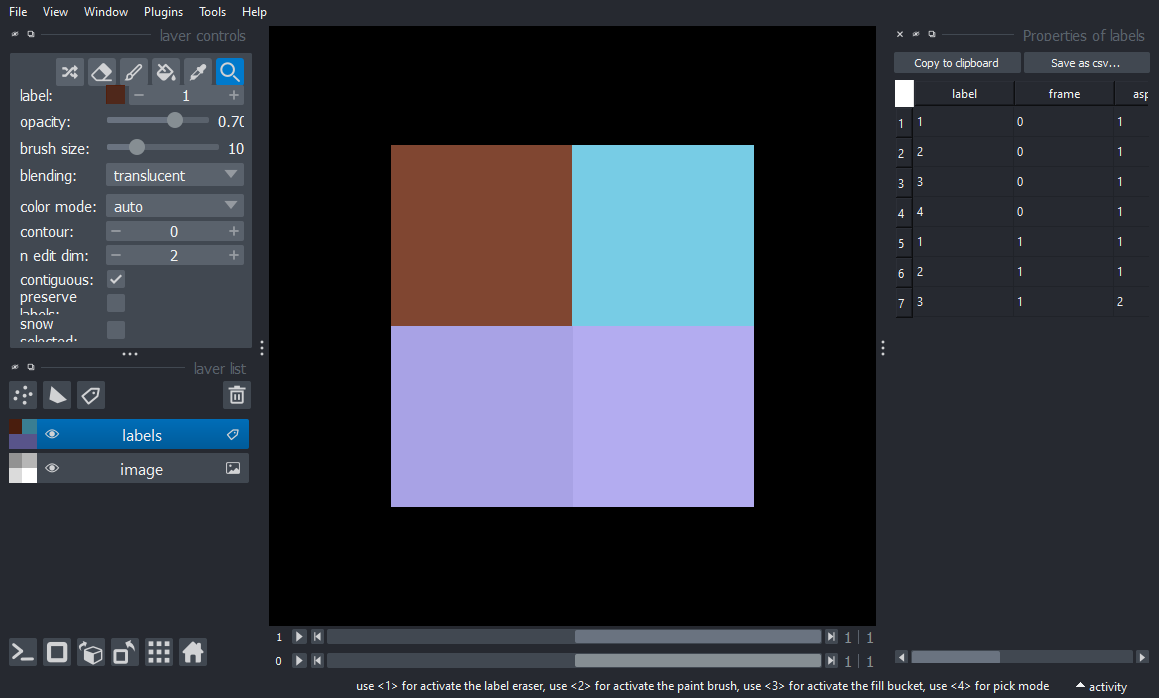

Selected column whatever
Selected column aspect_ratio


In [13]:
napari.utils.nbscreenshot(viewer)